Work in Progress. Will be updated by Friday. Zheyu Ni

This file cleans the Airbnb data. 
1. deleted $ sign and comma in price.
2. visualize price distribution base on different features
3. Price range (0, 800) covers 95\% of the listings
4. create a dummy for the listing without review data
The remaing detafile contains \% of the raw data

In [39]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.dates as mdates
from datetime import date
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('LA\March\listings.csv')


In [41]:
df.head(5)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,777451666060243581,https://www.airbnb.com/rooms/777451666060243581,20230307175359,2023-03-07,city scrape,Family oriented home,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490709958,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,698097753730921190,https://www.airbnb.com/rooms/698097753730921190,20230307175359,2023-03-07,city scrape,方便易居驿站,NaN,NaN,https://a0.muscache.com/pictures/d5afff58-d576...,444692513,...,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,13063118,https://www.airbnb.com/rooms/13063118,20230307175359,2023-03-07,city scrape,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,LOCATION! Luxury upstairs Oceanside Casita gue...,No need to fly away from Los Angeles for a get...,https://a0.muscache.com/pictures/6227287c-7073...,41736985,...,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,39337076,https://www.airbnb.com/rooms/39337076,20230307175359,2023-03-07,city scrape,Brand New Duplex Near World Cruise Center,Welcome to our new cozy duplex!<br /><br />Loc...,"Our property is close to downtown San Pedro, t...",https://a0.muscache.com/pictures/miso/Hosting-...,208375458,...,4.86,4.66,4.82,NaN,t,4,0,4,0,1.09
4,13077628,https://www.airbnb.com/rooms/13077628,20230307175359,2023-03-07,city scrape,Zuma Malibu Retreat,Our Private 16 Acre Malibu Retreat is located ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4182067,...,4.79,4.64,4.36,STR21-0228,f,1,1,0,0,0.18


In [73]:
#column_names =[df.columns,df.dtypes]
#list(column_names)

df.price[0:10]

0      $399.00
1       $46.00
2      $408.00
3       $80.00
4    $2,138.00
5       $55.00
6       $60.00
7       $55.00
8      $129.00
9      $107.00
Name: price, dtype: object

In [89]:
#data cleaning. Price data has $ sign. The following code extracts the number
df['price'] = df['price'].replace({r'\$':''},regex = True).replace({r',':''},regex = True).astype('float')
df.price

0         399.0
1          46.0
2         408.0
3          80.0
4        2138.0
          ...  
42446      40.0
42447      48.0
42448      46.0
42449      68.0
42450      48.0
Name: price, Length: 42451, dtype: float64

In [101]:
#frequency of different room type
print(df['room_type'].value_counts())


Entire home/apt    29491
Private room       12180
Shared room          697
Hotel room            83
Name: room_type, dtype: int64


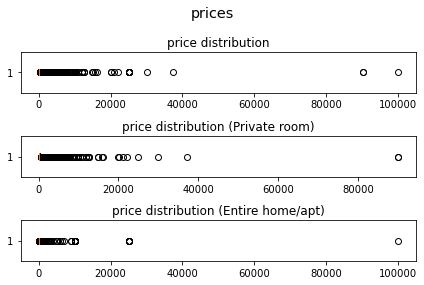

In [104]:

fig =plt.figure()
st=fig.suptitle("prices", fontsize="x-large")
# price distribution
ax1=fig.add_subplot(311)
ax1.boxplot(df.price,vert =0)
ax1.set_title("price distribution")

ax2=fig.add_subplot(312)
#  'room_type' price distribution
ax2.boxplot(df[df['room_type']!='Private room'].price,vert =0)

ax2.set_title("price distribution (Private room)")
fig.tight_layout()

ax3=fig.add_subplot(313)
#  'room_type' price distribution
ax3.boxplot(df[df['room_type']!='Entire home/apt'].price,vert =0)

ax3.set_title("price distribution (Entire home/apt)")
fig.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

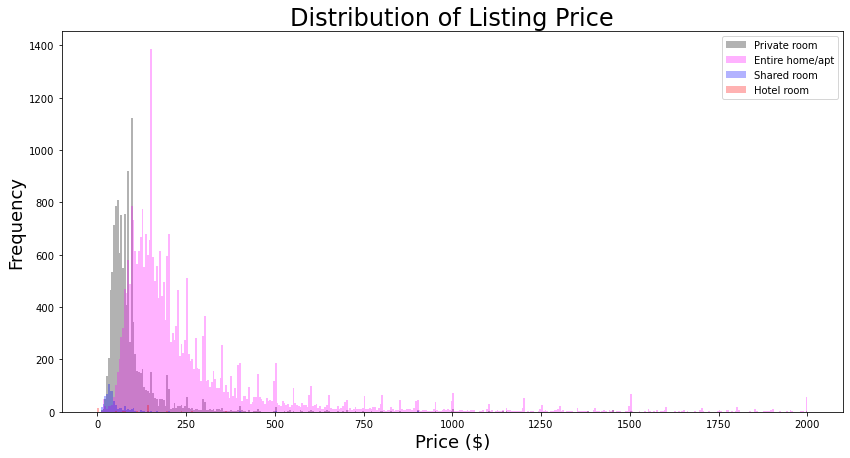

In [122]:
df[df['room_type']=='Private room'].price.plot(kind='hist',color='black',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Entire home/apt'].price.plot(kind='hist',color='magenta',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Shared room'].price.plot(kind='hist',color='blue',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)


plt.legend(labels=['Private room', 'Entire home/apt','Shared room','Hotel room'])
plt.title('Distribution of Listing Price', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)

For hotel rooms: 

Text(0, 0.5, 'Frequency')

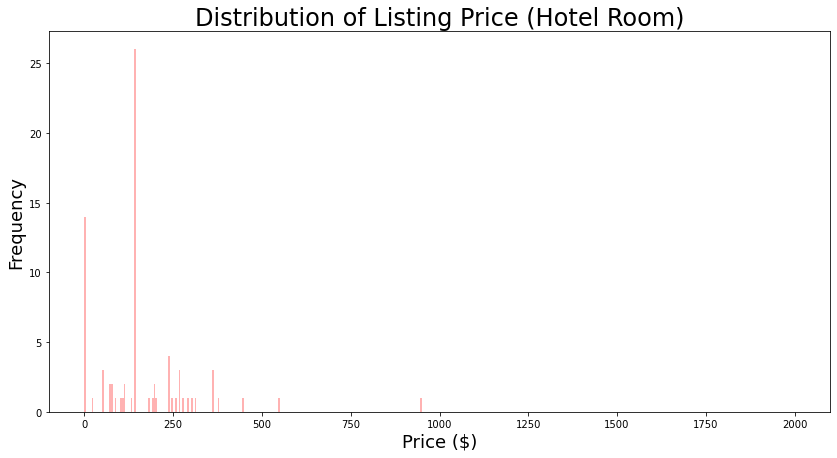

In [121]:
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
plt.title('Distribution of Listing Price (Hotel Room)', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)

In [129]:
len(df[df.price<800])
len(df.price)
len(df[df.price<800])/len(df.price)

0.9500836258274246

Price range (0,800) covers 95% of the listing data. 

Plot distribution for range (0,800)

Text(0, 0.5, 'Frequency')

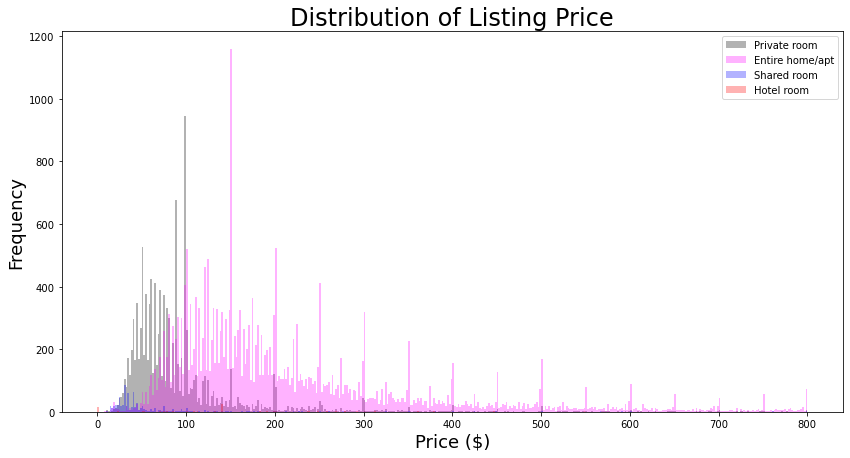

In [131]:
df[df['room_type']=='Private room'].price.plot(kind='hist',color='black',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Entire home/apt'].price.plot(kind='hist',color='magenta',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Shared room'].price.plot(kind='hist',color='blue',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)


plt.legend(labels=['Private room', 'Entire home/apt','Shared room','Hotel room'])
plt.title('Distribution of Listing Price', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)


In [132]:
df1=df[df.price<800]